In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [14]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index


# Display the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [16]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [17]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):  # k-values from 1 to 11
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [18]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  # k-values from 1 to 11
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

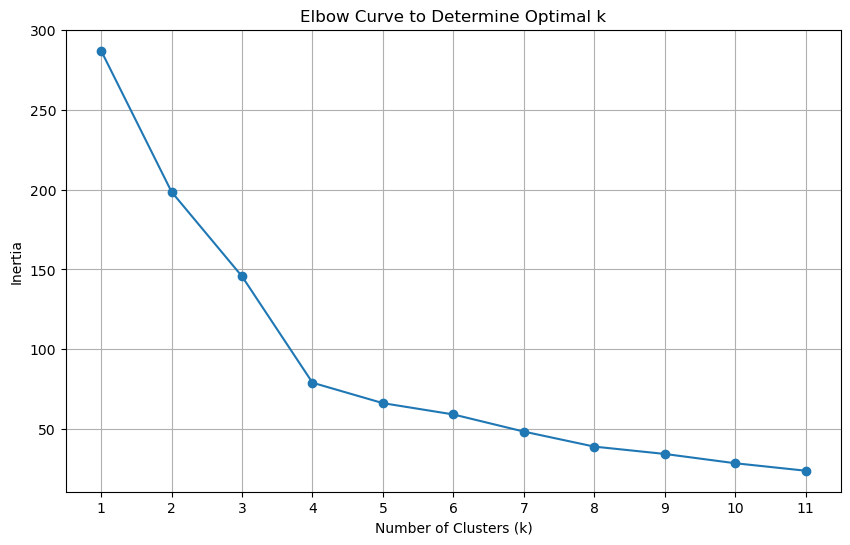

In [20]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [22]:
# Initialize the K-Means model using the best value for k
best_k = 4 
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [23]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)

c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print("Cluster Labels:", cluster_labels)

Cluster Labels: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [25]:
# Create a copy of the scaled DataFrame
df_clustered = df_scaled.copy()

In [27]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered["Cluster"] = cluster_labels

# Display the copy of the scaled DataFrame
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [28]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="Cluster",  # Color points by cluster labels
    colormap="Category10",  # Use a categorical colormap
    hover_cols=["Cluster"] + crypto_names.tolist(),  # Include cluster and crypto names in hover
    width=800,
    height=600,
    title="Cryptocurrency Clustering"
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [29]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [30]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_scaled)

# View the scaled PCA data
print("PCA Data (first 5 rows):\n", pca_data[:5])

PCA Data (first 5 rows):
 [[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [32]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

total_explained_variance = explained_variance.sum()
print("Explained Variance Ratio (each component):", explained_variance)
print("Total Explained Variance:", total_explained_variance)

Explained Variance Ratio (each component): [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [34]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(
    pca_data,  # The transformed data from PCA
    columns=["PCA1", "PCA2", "PCA3"],  # Naming the principal components
    index=df_scaled.index  # Copying the index (coin_id) from the original scaled DataFrame
)

# Display the scaled PCA DataFrame
df_pca.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [35]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [36]:
# Create an empty list to store the inertia values
inertia = []

for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using `df_pca`
    kmeans.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [37]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

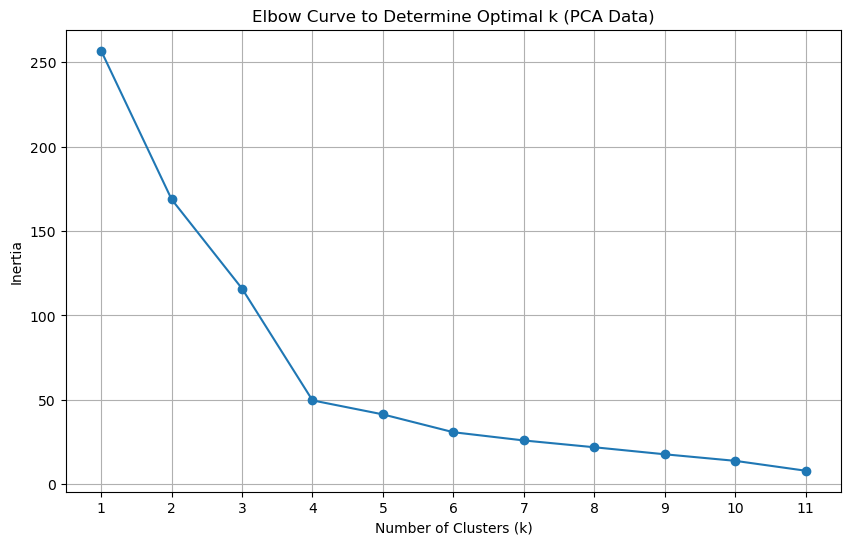

In [38]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-')
plt.title("Elbow Curve to Determine Optimal k (PCA Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [39]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace with the optimal k from the elbow curve
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)

In [40]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [41]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_cluster_labels = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print("Cluster Labels:", pca_cluster_labels)

Cluster Labels: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [42]:
# Create a copy of the scaled PCA DataFrame
df_pca_clustered = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clustered["Cluster"] = pca_cluster_labels

# Display the copy of the scaled PCA DataFrame
df_pca_clustered.head()

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [43]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot_pca = df_pca_clustered.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    c="Cluster",  # Color points by cluster labels
    colormap="Category10",  # Use a categorical colormap
    hover_cols=["Cluster"] + df_pca_clustered.index.tolist(),  # Include cluster label and crypto names in hover
    width=800,
    height=600,
    title="Cryptocurrency Clustering (PCA)"
)

# Display the scatter plot
scatter_plot_pca

:Scatter   [PCA1]   (PCA2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

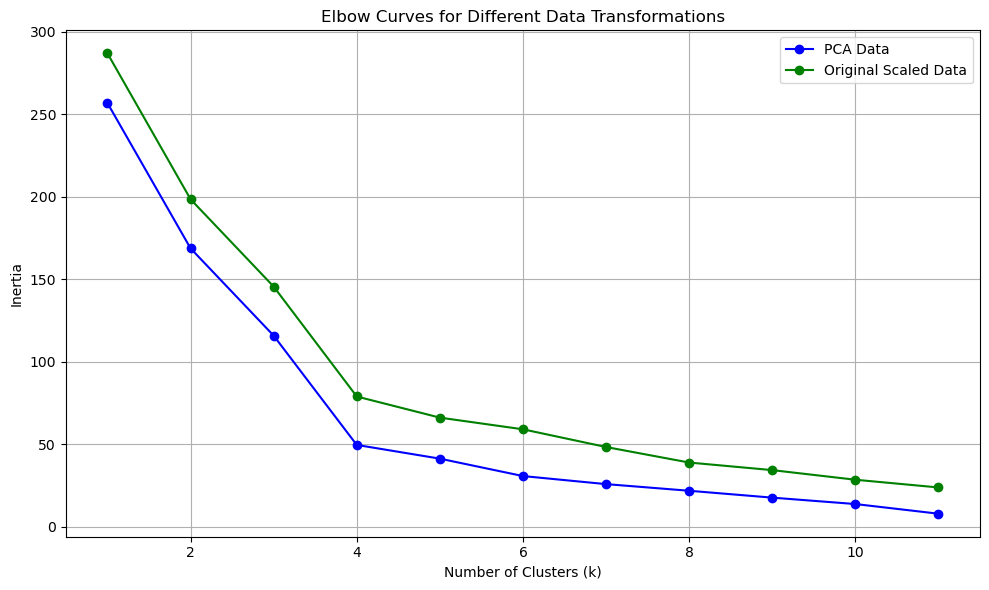

In [44]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_pca = []
inertia_original = []

# Compute the inertia for PCA data
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(df_pca)
    inertia_pca.append(kmeans_pca.inertia_)

# Compute the inertia for the original scaled data (df_scaled)
for k in k_values:
    kmeans_original = KMeans(n_clusters=k, random_state=0)
    kmeans_original.fit(df_scaled)
    inertia_original.append(kmeans_original.inertia_)

# Create a dictionary with the data for the Elbow curves
elbow_data_pca = {"k": k_values, "inertia_pca": inertia_pca}
elbow_data_original = {"k": k_values, "inertia_original": inertia_original}

# Create DataFrames for the data to plot the Elbow curves
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_original = pd.DataFrame(elbow_data_original)

# Create a composite plot with two elbow curves
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Elbow curve for PCA data
ax.plot(df_elbow_pca["k"], df_elbow_pca["inertia_pca"], marker='o', linestyle='-', label="PCA Data", color='blue')

# Plot the Elbow curve for original scaled data
ax.plot(df_elbow_original["k"], df_elbow_original["inertia_original"], marker='o', linestyle='-', label="Original Scaled Data", color='green')

# Add labels and title
ax.set_title("Elbow Curves for Different Data Transformations")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Inertia")
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ojess\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


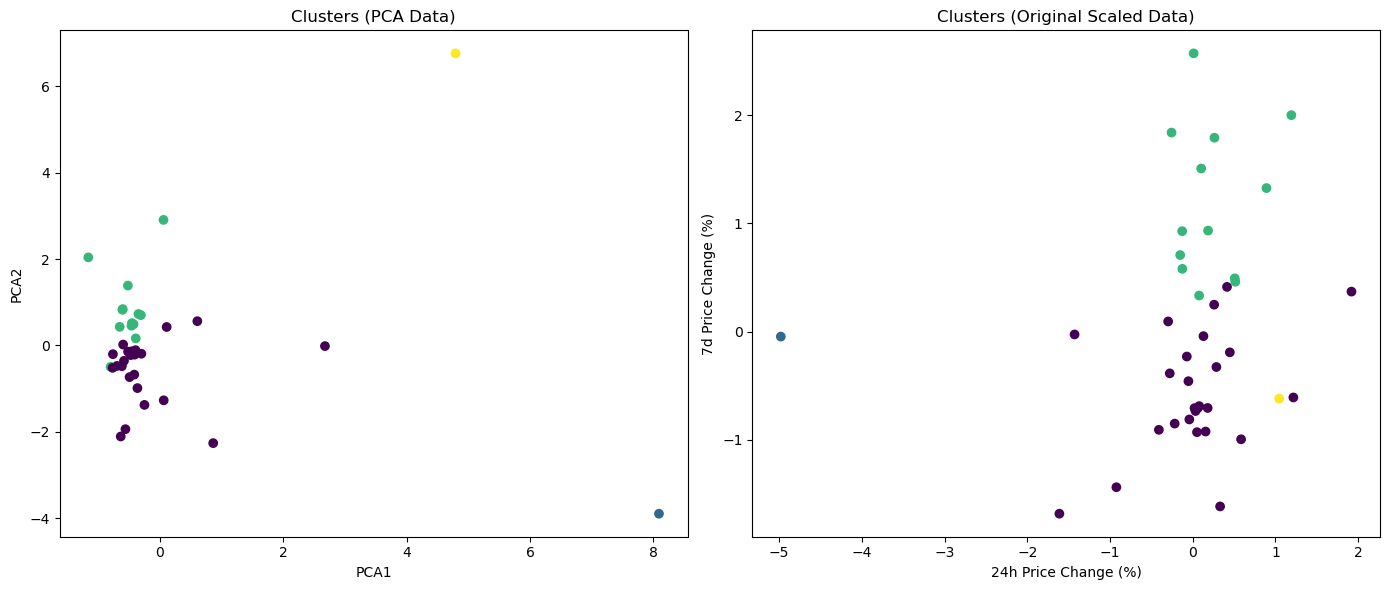

In [45]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans

# Initialize K-Means models using the best value for k (let's assume k=4)
best_k = 4

# Fit KMeans on PCA data
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)
kmeans_pca.fit(df_pca)
pca_clusters = kmeans_pca.predict(df_pca)

# Fit KMeans on original scaled data
kmeans_original = KMeans(n_clusters=best_k, random_state=0)
kmeans_original.fit(df_scaled)
original_clusters = kmeans_original.predict(df_scaled)

# Create a copy of the PCA DataFrame and add the cluster labels
df_pca_clustered = df_pca.copy()
df_pca_clustered["Cluster (PCA)"] = pca_clusters

# Create a copy of the original scaled DataFrame and add the cluster labels
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered["Cluster (Original)"] = original_clusters

# Create a composite plot with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters for PCA-transformed data (First Subplot)
ax[0].scatter(df_pca_clustered["PCA1"], df_pca_clustered["PCA2"], c=df_pca_clustered["Cluster (PCA)"], cmap="viridis", marker='o')
ax[0].set_title("Clusters (PCA Data)")
ax[0].set_xlabel("PCA1")
ax[0].set_ylabel("PCA2")

# Plot clusters for original scaled data (Second Subplot)
ax[1].scatter(df_scaled_clustered["price_change_percentage_24h"], df_scaled_clustered["price_change_percentage_7d"], c=df_scaled_clustered["Cluster (Original)"], cmap="viridis", marker='o')
ax[1].set_title("Clusters (Original Scaled Data)")
ax[1].set_xlabel("24h Price Change (%)")
ax[1].set_ylabel("7d Price Change (%)")

# Display the composite plot
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

When you perform cluster analysis using K-Means with fewer features (e.g., applying PCA or selecting a reduced set of features), the impact can be significant both in terms of the quality of the clusters and the interpretability of the results. Here's an analysis of the potential impacts:

1. Loss of Information:
Using fewer features, especially when applying PCA, means you're reducing the amount of information used to define the clusters. PCA creates new variables (principal components) that capture the most variance in the data. If fewer principal components (or features) are used, you're capturing less of the original data's variance, which can result in clusters that do not fully represent the original dataset's structure.
For example, when reducing to just two or three components, you're relying on the most significant aspects of the data, and less significant features might not be captured.
2. More Generalized (Coarse) Clusters:
When you reduce the number of features, the clusters that are formed are likely to be more generalized. For instance, using only the top principal components (PCs) might group cryptocurrencies together based on overarching trends but may miss subtler distinctions that would emerge when using the full set of features.
In contrast, using all features might yield more specific clusters with a greater ability to distinguish between similar data points.
3. Improved Performance and Reduced Computational Complexity:
Fewer features mean less computational cost. K-Means can be computationally expensive, especially when working with high-dimensional data. By reducing the number of features, you can speed up the clustering process, making it more efficient and easier to visualize.
This trade-off between computational cost and cluster precision is often a reason for dimensionality reduction techniques like PCA. However, this improvement in speed comes with the caveat of potential loss of detailed information.
4. Interpretability:
Using fewer features makes the results easier to interpret, especially when dealing with high-dimensional data. For example, PCA reduces the complexity of the data to just a few components (usually with each component representing a mix of the original features), which can simplify the analysis of the cluster structure.
However, while PCA-based clusters are easier to plot and visually analyze, interpreting what each cluster represents in terms of the original features can be more challenging. This is because the clusters are based on principal components, which are abstract combinations of the original features and might not directly correlate with specific features like price, market cap, etc.
5. Impact on Cluster Quality:
Reduced clusters' quality may be observed when using fewer features. Clustering on reduced data (such as PCA with only the first two or three components) may lead to clusters that:
Are less distinct or poorly separated, particularly if the eliminated features were crucial in distinguishing between groups.
Have larger within-cluster variance, meaning the data points within the same cluster might be more spread out than if all features were considered.
On the other hand, reducing features that are not relevant or are highly correlated can improve the clustering quality by removing noise or redundant information.
6. Cluster Separation and Visualization:
Using fewer features (e.g., 2 or 3 principal components in PCA) allows for easier visualization of the clusters in 2D or 3D space. While this makes interpretation and analysis easier, you may also lose some of the subtleties that exist in the original higher-dimensional feature space.
If the features that were removed were important for distinguishing between clusters, the visual separation between clusters in a 2D or 3D plot might not be as clear as it would be with all features.
7. Robustness and Overfitting:
Fewer features may lead to more robust clusters, as the model becomes less sensitive to noise and outliers present in less relevant features.
However, reducing too many features can lead to underfitting, where the K-Means model fails to capture important patterns in the data, especially if those patterns reside in the discarded features.
Conclusion:
Fewer features (PCA or feature selection) make the clustering process faster, easier to visualize, and less computationally intensive, but it can result in loss of fine-grained details and less accurate clustering if critical features are omitted.
The clusters may be more generalized, potentially sacrificing precision for simplicity and speed. However, this can be beneficial when trying to understand the overall trends or broad groupings in the data.
For optimal clustering: Consider a balance between dimensionality reduction and retaining enough relevant features to capture the data's key patterns. It's important to analyze how much variance (or explanatory power) is retained when reducing dimensions through PCA to avoid significant information loss.
In summary, using fewer features can simplify the clustering process and make it computationally feasible, but you may lose the richness and granularity needed to identify meaningful or nuanced clusters. This trade-off should be carefully considered depending on the goal of your analysis.